In [23]:
import numpy as np
import cv2 # opencv lib Image processing
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten  
from tensorflow.keras.layers import Convolution2D, MaxPooling2D 
from keras.utils import np_utils
from keras.datasets import mnist 


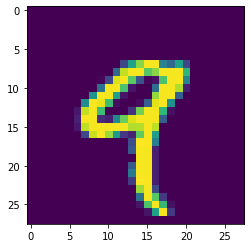

(60000, 28, 28)


In [24]:

(x_train, y_train), (x_test, y_test) = mnist.load_data() # data split into training and testing
plt.imshow(x_train[4])
plt.show()

print(x_train.shape)

In [25]:
# N, H, W, C 
#N: Total number of sample
# H: height of image
# W: width Image
# C: no. of channels

nb_classes = 10
x_train = x_train.reshape(X_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(X_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32') # type casting
x_test = x_test.astype('float32') # type casting


x_train /= 255  # Normalizagtion feature scaling # stanrdization 
x_test /= 255

#np_utils class object
Y_train = np_utils.to_categorical(y_train, nb_classes)  # Transfer target var into 1 dim vector
Y_test = np_utils.to_categorical(y_test, nb_classes) # Transfer target var into 1 dim vector


In [5]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) 
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))  # regularization 

model.add(Flatten())
model.add(Dense(128, activation='relu'))# fully Connected Layer FC
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # Classifier 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train, Y_train, batch_size=32, epochs=5, verbose=1)

Epoch 1/2
1875/1875 [==============================] - 90s 47ms/step - loss: 0.0592 - accuracy: 0.9811
Epoch 2/2
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0472 - accuracy: 0.9861


Actual digit is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 1


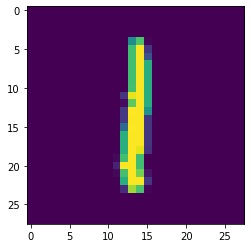

Actual digit is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], predicted 8


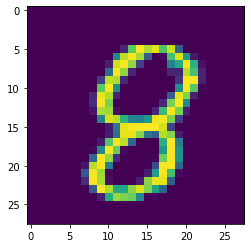

Actual digit is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], predicted 6


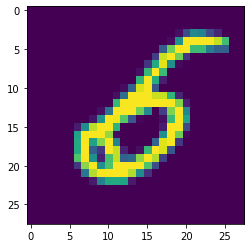

Actual digit is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 1


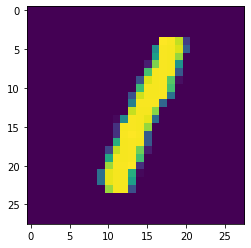

Actual digit is [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 0


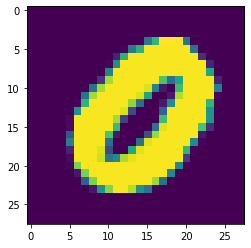

Actual digit is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], predicted 9


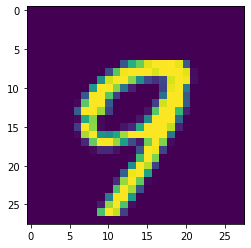

Actual digit is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], predicted 9


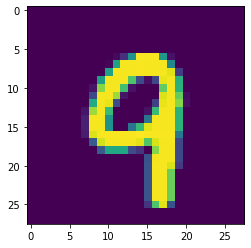

Actual digit is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], predicted 4


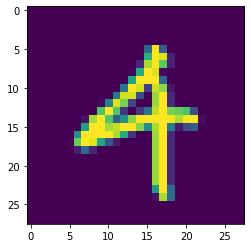

Actual digit is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], predicted 7


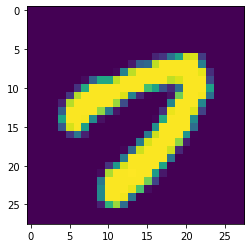

Actual digit is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 1


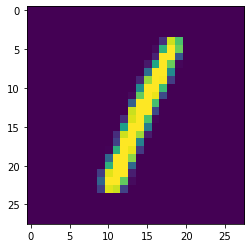

In [26]:

for i in np.random.choice(np.arange(0, len(Y_test)), size = (10,)):
    probs = model.predict(x_test[np.newaxis, i])
    prediction = probs.argmax(axis=1)

    image = (x_test[i] * 255).reshape((28, 28)).astype("uint8")
    print(f'Actual digit is {Y_test[i]}, predicted {prediction[0]}')
    plt.imshow(image)
    plt.show()
    #cv2.waitKey(0)             
